# Random Forest

## Imports

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from fastai import *
from fastai.tabular import *
# from pandas_summary import Data_FrameSummary
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import metrics
from IPython.display import display


In [3]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [4]:
??display

In [5]:
PATH = "data/bulldozers/"

In [6]:
!ls data/bulldozers

Train.csv


In [7]:
!ls {PATH}

Train.csv


In [8]:
!head data/bulldozers/Train.csv

In [9]:
name="sgm"

In [10]:
f"Hi {name.capitalize()}"

'Hi Sgm'

In [11]:
df_raw=pd.read_csv(f"{PATH}Train.csv",low_memory=False,
                   parse_dates=["saledate"])

In [12]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [14]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [16]:
len(df_raw.columns)

53

#### Taking of Target column.which can be used for calculating RMSE Error

In [17]:
df_raw["SalePrice"]=np.log(df_raw["SalePrice"])

In [18]:
df_raw["SalePrice"]

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

In [19]:
RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

### Intitial Processsing

In [20]:
m=RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop("SalePrice",axis=1),df_raw["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [21]:
df_raw["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [22]:
fld=df_raw["saledate"]

In [23]:
add_datepart??

#### Replacing saledate column with all features from datetype into new columns

In [24]:
add_datepart(df_raw,"saledate")

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,NaN,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,NaN,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401122,6333338,9.350102,1887659,21439,149,1.0,2005,NaN,NaN,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401123,6333341,9.104980,1903570,21435,149,2.0,2005,NaN,NaN,30NX,...,25,1,298,False,False,False,False,False,False,1319500800


In [25]:
len(df_raw.columns)

65

In [26]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [27]:
df_raw["saleYear"].head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

#### Replace all string in Columns with categories

In [28]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.

    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.

    Examples:
    ---------

    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a

    note the type of col2 is string

    >>> train_cats(df)
    >>> df

       col1 col2
    0     1    a
    1     2    b
    2     3    a

    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [29]:
??train_cat

Object `train_cat` not found.


In [30]:
train_cats(df_raw)

In [31]:
df_raw["UsageBand"].cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [32]:
df_raw["UsageBand"].cat.codes

0         1
1         1
2         0
3         0
4         2
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [33]:
df_raw["UsageBand"].cat.set_categories(["High","Medium","Low"],ordered=True,inplace=True)

In [34]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

### to_feather-dump the data as stored on memory

In [35]:
os.getcwd()

'/mnt/e/ubuntu/Projects/ML_Examples'

In [36]:
os.makedirs("tmp", exist_ok=True)
df_raw.to_feather("tmp/bulldozers_raw")

### read from feather format

In [37]:
df_raw=pd.read_feather("tmp/bulldozers_raw")

In [38]:
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.
    subset: Takes a random subset of size subset from df.
    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time (mean and standard deviation).
    Returns:
    --------
    [x, y, nas, mapper(optional)]:
        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.
        y: y is the response variable
        nas: returns a dictionary of which nas it created, and the associated median.
        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
        variables which is then used for scaling of during test-time.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> x, y, nas = proc_df(df, 'col1')
    >>> x
       col2
    0     1
    1     2
    2     1
    >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
                 children=[4., 6, 3, 3, 2, 3, 5, 4],
                 salary=[90, 24, 44, 27, 32, 59, 36, 27])
    >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
                          ([:children], StandardScaler())])
    >>>round(fit_transform!(mapper, copy(data)), 2)
    8x4 Array{Float64,2}:
    1.0  0.0  0.0   0.21
    0.0  1.0  0.0   1.88
    0.0  1.0  0.0  -0.63
    0.0  0.0  1.0  -0.63
    1.0  0.0  0.0  -1.46
    0.0  1.0  0.0  -0.63
    1.0  0.0  0.0   1.04
    0.0  0.0  1.0   0.21
    """
    
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res    
    

In [39]:
def numericalize(df, col, name, max_n_cat):
    """ Changes the column col from a categorical type to it's integer codes.
    Parameters:
    -----------
    df: A pandas dataframe. df[name] will be filled with the integer codes from
        col.
    col: The column you wish to change into the categories.
    name: The column name you wish to insert into df. This column will hold the
        integer codes.
    max_n_cat: If col has more categories than max_n_cat it will not change the
        it to its integer codes. If max_n_cat is None, then col will always be
        converted.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> numericalize(df, df['col2'], 'col3', None)
       col1 col2 col3
    0     1    a    1
    1     2    b    2
    2     3    a    1
    """
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1


In [40]:
def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.
    Parameters:
    -----------
    df: The data frame that will be changed.
    col: The column of data to fix by filling in missing data.
    name: The name of the new filled column in df.
    na_dict: A dictionary of values to create na's of and the value to insert. If
        name is not a key of na_dict the median will fill any missing data. Also
        if name is not a key of na_dict and there is no missing data in col, then
        no {name}_na column is not created.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1     2    2    True
    2     3    2   False
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col2'], 'col2', {})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {'col1' : 500})
    >>> df
          col1 col2 col1_na
    0     1    5   False
    1   500    2    True
    2     3    2   False
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [41]:
def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.
    Parameters:
    -----------
    df: A pandas data frame, that you wish to sample from.
    n: The number of rows you wish to sample.
    Returns:
    --------
    return value: A random sample of n rows of df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    >>> get_sample(df, 2)
       col1 col2
    1     2    b
    2     3    a
    """
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()


#### Replace categories with numerics codes,handle missing continuous values and split dependent variable into seperate variable

In [42]:
# proc_df

In [43]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [44]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [45]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


In [46]:
m=RandomForestRegressor(n_jobs=-1,n_estimators=10)
m.fit(df,y)
m.score(df,y)

0.9830223407120553

In [47]:
def split_vals(a,n):
    return a[:n].copy(),a[n:].copy()

In [48]:
n_valid=12000
n_trn=len(df)-n_valid
raw_train,raw_valid=split_vals(df_raw,n_trn)
X_train,X_valid=split_vals(df,n_trn)
y_train,y_valid=split_vals(y,n_trn)

X_train.shape,X_valid.shape,y_train.shape

((389125, 66), (12000, 66), (389125,))

In [49]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [50]:
def print_score(m):
    res=[rmse(m.predict(X_train),y_train),rmse(m.predict(X_valid),y_valid),
         m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,"oob_score_"):res.append(m.oob_score_)
    print(res)

In [51]:
m=RandomForestRegressor(n_jobs=-1,n_estimators=10)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 1min 23s, sys: 812 ms, total: 1min 23s
Wall time: 16 s
[0.09008512595763785, 0.2510110661312753, 0.9830394080262648, 0.8874789669868443]


### Speed Things Up

In [52]:
df_trn, y_trn, nas = proc_df(df_raw,"SalePrice",subset=30000)
X_train, _ = split_vals(df_trn,20000)
y_train, _ = split_vals(y_trn,20000)

In [53]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 30.7 s, sys: 31.2 ms, total: 30.8 s
Wall time: 4.12 s
[0.09338584378166923, 0.3552662792224525, 0.9809926988833568, 0.7745989425879074]


# Hyperparameter 1- n_estimators

### Single Tree in RandomForest

In [54]:
m = RandomForestRegressor(n_estimators=1,max_depth=3,bootstrap=False,n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.523961146992292, 0.5823495057026573, 0.40164830046146927, 0.39435882082813345]


In [55]:
import IPython, graphviz
from sklearn.tree import export_graphviz
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))


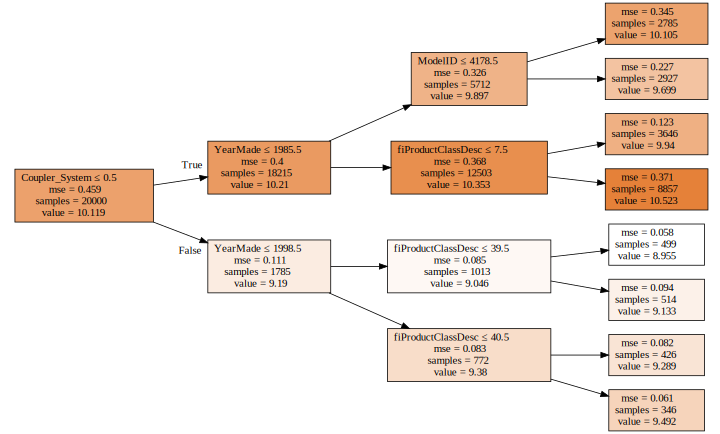

In [56]:
draw_tree(m.estimators_[0],df_trn,precision=3)

#### If max_depth constraint is removed -- overfitting

In [57]:
m = RandomForestRegressor(n_estimators = 1, bootstrap = False, n_jobs = -1)
m.fit(X_train,y_train)
print_score(m)

[5.329070518200751e-17, 0.48679830446796035, 1.0, 0.5767995821909364]


#### Bagging of multiple single trees (Ensembling) --->> RandomForest
Create multiple models (estimators) where their errors are un co-related to eachother as much as possible. 
Average of random errors (from each individual overfitting) is Zero

In [58]:
m=RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 31.3 s, sys: 219 ms, total: 31.5 s
Wall time: 4.22 s
[0.093319435994364, 0.35455727746261867, 0.9810197219087813, 0.7754977066432907]


#### Bootstrapping - 
In scikitlearn, for n rows pick out n rows with replacement.Thus on average 63.3% rows are represented and many of them will be represented multiple times

#### ExtraTreesRegressor also has same api as RandomForestRegressor 
but it randomly tries a few splits fo few variables instead of trying split of all variables. Its much faster,has more randomness and can be used to get better generalization

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
e=ExtraTreesRegressor(n_jobs=-1)
%time e.fit(X_train,y_train)
print_score(e)

CPU times: user 21.3 s, sys: 281 ms, total: 21.6 s
Wall time: 2.89 s
[8.352366821386374e-08, 0.32720956007741103, 0.9999999999999848, 0.8087946931150806]


In [60]:
m=RandomForestRegressor(n_estimators=10,n_jobs=-1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 2.86 s, sys: 0 ns, total: 2.86 s
Wall time: 662 ms
[0.11302002980925235, 0.36885738190245626, 0.9721600022658868, 0.7570231302820031]


In [61]:
preds=np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0],np.mean(preds[:,0]),y_valid[0]

(array([9.472705, 8.987197, 9.409191, 9.392662, 9.392662, 9.392662, 9.433484, 9.159047, 9.392662, 9.711116]),
 9.374338706367524,
 9.104979856318357)

In [62]:
preds.shape

(10, 12000)

<IPython.core.display.Javascript object>


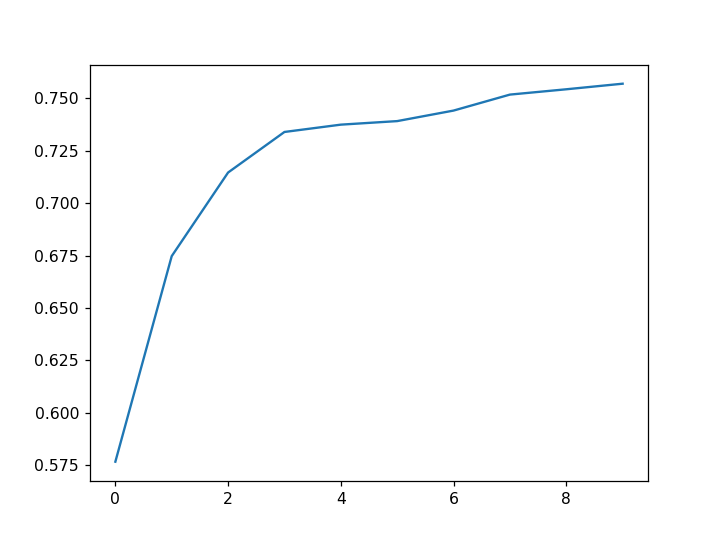

In [65]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1],axis=0)) for i in range(10)]);

In [66]:
m=RandomForestRegressor(n_estimators=20,n_jobs=-1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 5.7 s, sys: 15.6 ms, total: 5.72 s
Wall time: 983 ms
[0.10172532251815038, 0.3648868558686026, 0.9774463668805501, 0.7622259733382364]


In [67]:
m=RandomForestRegressor(n_estimators=40,n_jobs=-1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 11.8 s, sys: 62.5 ms, total: 11.9 s
Wall time: 1.64 s
[0.09584693953974181, 0.3551063731051167, 0.9799776586667043, 0.7748018039261423]


In [68]:
m=RandomForestRegressor(n_estimators=80,n_jobs=-1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 23.6 s, sys: 109 ms, total: 23.7 s
Wall time: 3.17 s
[0.09374810240486268, 0.34830575579652434, 0.9808449481420125, 0.7833447204557171]


## Out-of-bag (OOB) score
(This is unique to RandomForest)

-when data is small and we need to pull out a validation set but this will lead to a scenario when we don't have enough data to build a good model.

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

In [69]:
m=RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.09589653662588925, 0.3579338250832916, 0.9799569317300866, 0.7712013502653459, 0.855993802466734]


#### Gridsearch is used to search best hyperparamters.
oob_score can be used in it get the best hyperparamters

## Reducing over-fitting

### Subsampling

In [84]:
df_trn,y_trn,nas=proc_df(df_raw,"SalePrice")
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [71]:
n_trn

389125

In [72]:
len(df_trn)

401125

In [73]:
len(X_train)

389125

In [74]:
from sklearn.ensemble import forest
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))
    
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [75]:
set_rf_samples(20000)

In [76]:
# reset_rf_samples()   #to reset the subsampling

In [85]:
m=RandomForestRegressor(n_estimators=10,n_jobs=-1,oob_score=True)
%time m.fit(X_train,y_train)
print_score(m)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 1min 20s, sys: 1.45 s, total: 1min 21s
Wall time: 16.6 s
[0.09068983529108167, 0.25168148529173806, 0.9828109429747978, 0.8868771051004027, -1.3421364413464647]


In [87]:
m=RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 5min 57s, sys: 2.7 s, total: 5min 59s
Wall time: 50.8 s
[0.07826472148457549, 0.2370640703256232, 0.9871983215563086, 0.8996356566085015, 0.9086201951636392]


### Tree Building parameters

In [ ]:
# reset_rf_samples()   #to reset the subsampling

In [88]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [87]:
m=RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 5min 57s, sys: 2.7 s, total: 5min 59s
Wall time: 50.8 s
[0.07826472148457549, 0.2370640703256232, 0.9871983215563086, 0.8996356566085015, 0.9086201951636392]


In [89]:
t=m.estimators_[0].tree_

In [90]:
dectree_max_depth(t)

47

In [91]:
m=RandomForestRegressor(n_estimators=40,n_jobs=-1,min_samples_leaf=3,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.11504565487219594, 0.2347812044787304, 0.9723385292782522, 0.9015593151050757, 0.908527424794436]


In [93]:
m=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features=0.5,n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.11910093261153172, 0.22913414087709197, 0.9703540651064616, 0.9062378448120076, 0.9117600835121475]
